In [43]:
import os
base_dir = 'C:\Users\Ben\Documents\GitHub\plate_reader_code'
os.chdir(base_dir) 

#import sys
from core import od_reader_data_load as odl
from core import od_reader_plot_functions as odp
#from IPython.core.debugger import Tracer
from core import growth_curve_fit as gc_fit
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sns
#from pandas.tools.plotting import scatter_matrix

# import sys
# from ..core import od_reader_data_load as odl
# from ..core import od_reader_plot_functions as odp
# from IPython.core.debugger import Tracer
# from ..core import growth_curve_fit as gc_fit
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# from pandas.tools.plotting import scatter_matrix

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [3]:
dirname = "C:/Users/Ben/Google Drive/UCSF/ElSamad_Lab/PKA/WetLab/Plate_reader/"

In [10]:
fname = "20150410_MSN2vMSN4.csv"
#Each column is a time point with 96 measurements. Rows are transposed into columns and stacked on top of one another from row A to H.  
ntimes = 93
nrows = 8
ncols = 12
starting_row = 'A'
starting_col = 1

OD_data, time_list = odl.get_OD_data(dirname,fname, ntimes, nrows, ncols,starting_row,starting_col)


#Multiindex object 
layer_names = ['Strain', 'Biol_Rep','Tech_Rep']
strains = ['AS_M2_M4_46', 'AS_M2_M4dZF_47', 'AS_M2_WT_MS01', 'M2_M4_48', 'M2_M4dZF_49', 'M2_WT_HES11-38', 'M2_WT_OLD_SDC_HES11-38','WT_M4dZF_45', 'WT_WT_HES5-41','WT_M4_44','AS_M4_dZF_51']
biol_reps = ['BR1', 'BR2','BR3']
tech_reps = ['TR1','TR2']      
experiment_setup = [strains, biol_reps, tech_reps]      
data_index = pd.MultiIndex.from_product(experiment_setup, names= layer_names)
#Remove missing conditions from data - need to do this if e.g. you don't have the same number of replicates as conditions 

# Only had one technical replicate for this strain
strains_missing_rep = ['WT_M4_44','AS_M4_dZF_51']
Nbiol_reps = len(biol_reps)
Ntech_reps = len(tech_reps)
missing_condition_indices = []
for strain in strains_missing_rep: 
    ind_missing_rep = strains.index(strain)
    missing_condition_indices = missing_condition_indices + range(ind_missing_rep*Nbiol_reps*Ntech_reps+1,(ind_missing_rep+1)*Nbiol_reps*Ntech_reps-1+2,2)


data_index_adjusted = data_index.set_labels([np.delete(label_level,[missing_condition_indices]) for label_level in data_index.labels])

data_index_adjusted

#Data goes in order: (strain[0],biol_rep[0],tech_rep[0]), (strain[0],biol_rep[0],tech_rep[1]), (strain[0],biol_rep[1],tech_rep[0]), (strain[0],biol_rep[1],tech_rep[1]), ...

wells = ['B2','C2','D2','E2','F2','G2',
         'B3','C3','D3','E3','F3','G3',
         'B9','C9','D9','E9','F9','G9', 
         'B4','C4','D4','E4','F4','G4',
         'B5','C5','D5','E5','F5','G5',
         'B10','C10','D10','E10','F10','G10',
         'B11','C11','D11','E11','F11','G11',
         'B7','C7','D7','E7','F7','G7',
         'B8','C8','D8','E8','F8','G8', 
         'B6','C6','D6',
         'E6','F6','G6']

# # color_list = ['k','g','b','c']
blank = np.mean(OD_data.data[OD_data.index['A2']])
growth_data = [OD_data.data[OD_data.index[well]]-blank for well in wells ]
# # # #len(growth_data)
growth_data_df = pd.DataFrame(growth_data, index=data_index_adjusted, columns = time_list)
growth_data_df
#growth_data_df.sort_index(inplace = True)


0.0      15.0     30.0     45.0    \
Strain                 Biol_Rep Tech_Rep                                       
AS_M2_M4_46            BR1      TR1       0.00229  0.00279  0.00349  0.00379   
                                TR2       0.00279  0.00349  0.00419  0.00459   
                       BR2      TR1       0.00069  0.00079  0.00109  0.00119   
                                TR2       0.00269  0.00289  0.00319  0.00339   
                       BR3      TR1       0.00379  0.00449  0.00539  0.00579   
                                TR2       0.00399  0.00519  0.01159  0.01219   
AS_M2_M4dZF_47         BR1      TR1       0.00099  0.00179  0.00249  0.00449   
                                TR2       0.00239  0.00299  0.00359  0.00399   
                       BR2      TR1       0.00039  0.00039  0.00069  0.00109   
                                TR2       0.00039  0.00059  0.00099  0.00129   
                       BR3      TR1       0.00609  0.00659  0.00779  0.00879   
                                TR2       0.00549  0.00669  0.00779  0.00859   
AS_M2_WT_MS01          BR1      TR1       0.00479  0.00559  0.00689  0.00769   
                                TR2       0.00449  0.00599  0.00689  0.00789   
                       BR2      TR1       0.00169  0.00179  0.00249  0.00279   
                                TR2       0.00299  0.00329  0.00389  0.00449   
                       BR3      TR1       0.00829  0.00959  0.01119  0.01269   
                                TR2       0.00749  0.00859  0.01019  0.01139   
M2_M4_48               BR1      TR1       0.00279  0.00359  0.00449  0.00529   
                                TR2       0.00299  0.00399  0.00499  0.00549   
                       BR2      TR1       0.00129  0.00159  0.00229  0.00279   
                                TR2       0.00139  0.00189  0.00259  0.00309   
                       BR3      TR1       0.01049  0.01149  0.01349  0.01439   
                                TR2       0.01159  0.01259  0.01389  0.01549   
M2_M4dZF_49            BR1      TR1       0.00169  0.00239  0.00299  0.00359   
                                TR2       0.00159  0.00239  0.00309  0.00369   
                       BR2      TR1      -0.00061 -0.00051 -0.00031 -0.00011   
                                TR2      -0.00141 -0.00111 -0.00071 -0.00031   
                       BR3      TR1       0.00309  0.00369  0.00429  0.00469   
                                TR2       0.00339  0.00529  0.00459  0.00499   
M2_WT_HES11-38         BR1      TR1       0.00209  0.00289  0.00369  0.00439   
                                TR2       0.00299  0.00349  0.00449  0.00529   
                       BR2      TR1       0.00039  0.00069  0.00099  0.00129   
                                TR2       0.00119  0.00119  0.00189  0.00199   
                       BR3      TR1       0.00359  0.00409  0.00509  0.00599   
                                TR2       0.00289  0.00349  0.00439  0.00549   
M2_WT_OLD_SDC_HES11-38 BR1      TR1       0.00549  0.00629  0.00689  0.00789   
                                TR2       0.00299  0.00369  0.00449  0.00539   
                       BR2      TR1      -0.00011  0.00039  0.00099  0.00099   
                                TR2       0.00069  0.00079  0.00149  0.00149   
                       BR3      TR1       0.00439  0.00459  0.00589  0.00649   
                                TR2       0.00299  0.00389  0.00499  0.00539   
WT_M4dZF_45            BR1      TR1       0.00509  0.00619  0.00709  0.00849   
                                TR2       0.00549  0.00669  0.00779  0.00879   
                       BR2      TR1      -0.00031 -0.00001  0.00079  0.00119   
                                TR2       0.00019  0.00059  0.00139  0.00209   
                       BR3      TR1       0.00649  0.00739  0.00839  0.00969   
                                TR2       0.00579  0.00689  0.00819  0.00929   
WT_WT_HES5-41          BR1      TR1       0

<IPython.core.display.Javascript object>


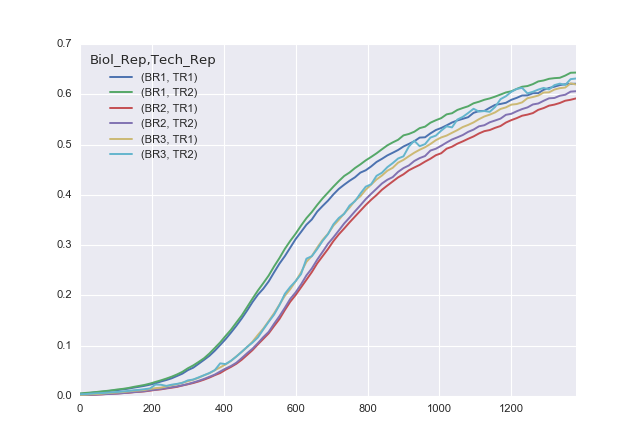

In [71]:
#Plot growth data for a set of strains: 
strains = ['WT_WT_HES5-41', 'WT_M4dZF_45','WT_M4_44']
growth_data_df.loc['WT_WT_HES5-41'].transpose().plot()

#growth_data_df.loc[strain].groupby(level='Condition').mean().transpose()

<IPython.core.display.Javascript object>


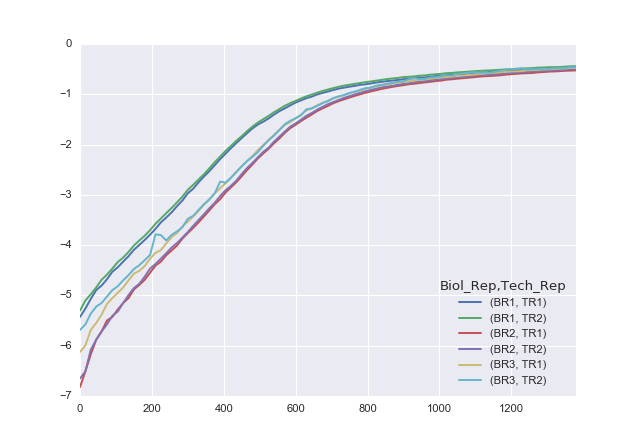

In [72]:
#plot log of OD data
np.log(growth_data_df.loc['WT_WT_HES5-41']).transpose().plot()

<IPython.core.display.Javascript object>


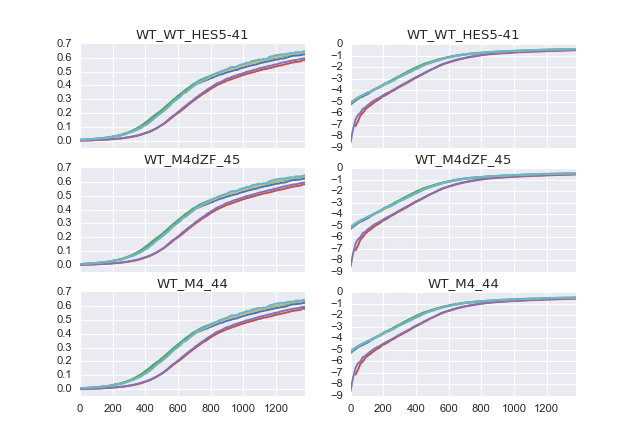

In [67]:
strains = ['WT_WT_HES5-41', 'WT_M4dZF_45','WT_M4_44']
fig1, axarr = plt.subplots(len(strains),2,sharex = True)

for jj in range(len(strains)):
    strain = strains[jj]
    strain_data = growth_data_df.loc[strains[1]].transpose()
    strain_data.plot(ax = axarr[jj,0])
    ax = axarr[jj,0]
    ax.set_title(strain)
    ax.set_ylim([-0.05,0.7])
    ax.legend_.remove()
    axarr[jj,0] = ax
    np.log(strain_data).plot(ax = axarr[jj,1])
    ax = axarr[jj,1]
    ax.set_title(strain)
    ax.set_ylim([-9,0])
    ax.legend_.remove()
    axarr[jj,1] = ax
#     ax = axarr[jj]
#     handles,labels = ax.get_legend_handles_labels()
#     lines = ax.get_lines()
#     labels_perm = [0,1,2]
#     colors = cm.BuPu(np.linspace(0.2,1,len(labels_perm)))
#     nn = 0
#     lines_sorted = []
#     for ind in labels_perm:
#         line = lines[ind]
#         line.set_color(colors[nn])
#         lines_sorted.append(line)
#         nn = nn+1
#     ax.lines = lines_sorted
#     if jj == 0: 
#         ax.legend(loc='upper left')
#     else: 
#         ax.legend_.remove()
#     ax.set_title(strain)
#     ax.set_ylim([0,0.7])
#     axarr[jj] = ax
plt.show()

In [ ]:
#Chose time 150 and 400 to be linear range.

t = growth_data_df.columns
t_low = 140.0 
t_high = 410.0
t_check = (t>t_low)*(t<t_high)
#finds indices of all time values above t_low
t_inds = [ind for ind,val in enumerate(t_check) if val==True]

growth_data_linear_range = growth_data_df.loc[,t_inds]
t_linear_range = t[t_inds]

In [37]:
def log_slope(growth_data):
    #finds the slope of the log of the input data
    t = growth_data_in.index
    log_od = np.log(growth_data)
    lst_sqrs_mat = np.vstack([t, np.ones(len(t))]).T
    slope, intercept = np.linalg.lstsq(lst_sqrs_mat, log_od)[0]
    return slope

In [92]:


bg_strains = ["WT","WT Msn2(dZF)-RFP" , "AS Msn2(dZF)-RFP"]
for jj,strain in enumerate(bg_strains):
    print jj
    print strain

0
WT
1
WT Msn2(dZF)-RFP
2
AS Msn2(dZF)-RFP


<IPython.core.display.Javascript object>


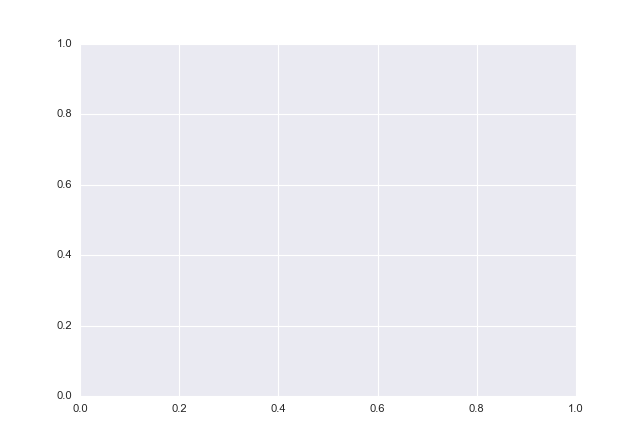

<IPython.core.display.Javascript object>


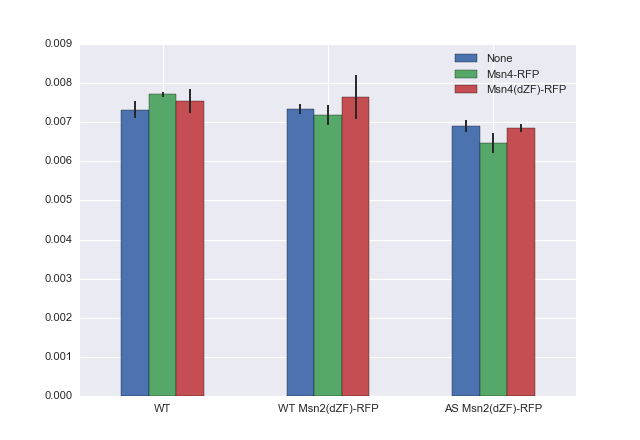

In [100]:
fix, ax = plt.subplots()
growth_slopes = growth_data_linear_range.apply(log_slope, axis = 1)
growth_slopes_tech_rep_groups = growth_slopes.groupby(level = ('Strain','Biol_Rep'))
growth_slopes_tech_rep_mean = growth_slopes_tech_rep_groups.mean()
growth_slopes_biol_rep_mean = growth_slopes_tech_rep_mean.groupby(level='Strain').mean()
growth_slopes_biol_rep_sem = growth_slopes_tech_rep_mean.groupby(level='Strain').std()/np.sqrt(3)
strains = ['WT_WT_HES5-41','M2_WT_HES11-38','AS_M2_WT_MS01','WT_M4_44','M2_M4_48','AS_M2_M4_46' ,'WT_M4dZF_45','M2_M4dZF_49','AS_M2_M4dZF_47']
#strains =  ['AS_M2_M4_46', 'AS_M2_M4dZF_47', 'AS_M2_WT_MS01', 'M2_M4_48', 'M2_M4dZF_49', 'M2_WT_HES11-38', 'M2_WT_OLD_SDC_HES11-38','WT_M4dZF_45', 'WT_WT_HES5-41','WT_M4_44','AS_M4_dZF_51']
#growth_slopes_biol_rep_mean[strains].plot(kind = "bar", yerr = growth_slopes_biol_rep_sem[strains])

#make a dataframe to contain the means and the slopes and group by background strain (in rows) and presence of Msn4 reporter (in columns)

bg_strains = ["WT","WT Msn2(dZF)-RFP" , "AS Msn2(dZF)-RFP"] #rows

msn4_reporters = ["None","Msn4-RFP","Msn4(dZF)-RFP"]  #columns

strain_dict = {('WT','None'):'WT_WT_HES5-41',('WT Msn2(dZF)-RFP','None'):'M2_WT_HES11-38',('AS Msn2(dZF)-RFP','None'):'AS_M2_WT_MS01',
               ('WT','Msn4-RFP'):'WT_M4_44',('WT Msn2(dZF)-RFP','Msn4-RFP'):'M2_M4_48',('AS Msn2(dZF)-RFP','Msn4-RFP'):'AS_M2_M4_46' ,
               ('WT','Msn4(dZF)-RFP'):'WT_M4dZF_45',('WT Msn2(dZF)-RFP','Msn4(dZF)-RFP'):'M2_M4dZF_49',('AS Msn2(dZF)-RFP','Msn4(dZF)-RFP'):'AS_M2_M4dZF_47'}

strain_slopes = np.zeros((len(bg_strains),len(msn4_reporters)))
strain_slopes_sem = np.zeros((len(bg_strains),len(msn4_reporters)))
#a[1,1] = 4
for jj, bg_strain in enumerate(bg_strains):
    for kk,msn4_reporter in enumerate(msn4_reporters):
        strain_slopes[jj,kk] = growth_slopes_biol_rep_mean[strain_dict[(bg_strain,msn4_reporter)]]
        strain_slopes_sem[jj,kk] = growth_slopes_biol_rep_sem[strain_dict[(bg_strain,msn4_reporter)]]

strain_slopes_df = pd.DataFrame(strain_slopes, columns = msn4_reporters,index = bg_strains)
strain_slopes_sem_df = pd.DataFrame(strain_slopes_sem,columns = msn4_reporters,index = bg_strains)

strain_slopes_df.plot.bar(yerr = strain_slopes_sem_df, rot = 0)
        



In [ ]:
log_od = np.log(OD_linear_range[well])
        lst_sqrs_mat = np.vstack([t_linear_range, np.ones(len(t_linear_range))]).T
        slope, intercept = np.linalg.lstsq(lst_sqrs_mat, log_od)[0]